# Candlestick Three Advancing White Soldiers

https://www.investopedia.com/terms/t/three_white_soldiers.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'EXEL'
start = '2020-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,17.709999,17.770000,17.240000,17.660000,17.660000,2952200
2020-01-03,17.309999,17.389999,16.930000,17.010000,17.010000,2330800
2020-01-06,16.930000,17.590000,16.700001,17.559999,17.559999,3189900
2020-01-07,17.660000,18.799999,17.570000,18.680000,18.680000,5423500
2020-01-08,18.549999,19.150000,18.430000,18.950001,18.950001,3275400


## Candlestick with Three Advancing White Soldiers

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,17.709999,17.770000,17.240000,17.660000,17.660000,2952200,False
1,737427.0,17.309999,17.389999,16.930000,17.010000,17.010000,2330800,False
2,737430.0,16.930000,17.590000,16.700001,17.559999,17.559999,3189900,True
3,737431.0,17.660000,18.799999,17.570000,18.680000,18.680000,5423500,True
4,737432.0,18.549999,19.150000,18.430000,18.950001,18.950001,3275400,True


Text(0, 0.5, 'Price')

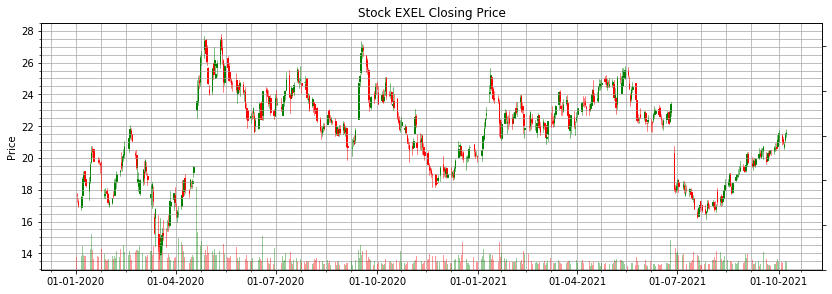

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
three_white_soldiers = talib.CDL3WHITESOLDIERS(df['Open'], df['High'], df['Low'], df['Close'])

three_white_soldiers = three_white_soldiers[three_white_soldiers != 0]

In [6]:
df['three_white_soldiers'] = talib.CDL3WHITESOLDIERS(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['three_white_soldiers'] !=0]

,Open,High,Low,Close,Adj Close,Volume,three_white_soldiers
Date,,,,,,,
2021-03-15,23.4,24.200001,23.09,24.17,24.17,2126600,100


In [8]:
df['Adj Close'].loc[df['three_white_soldiers'] !=0]

Date
2021-03-15    24.17
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['three_white_soldiers'] !=0].index

DatetimeIndex(['2021-03-15'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
three_white_soldiers

Date
2021-03-15    100
dtype: int32

In [11]:
three_white_soldiers.index

DatetimeIndex(['2021-03-15'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,three_white_soldiers
Date,,,,,,,
2020-01-02,17.709999,17.770000,17.240000,17.660000,17.660000,2952200,0
2020-01-03,17.309999,17.389999,16.930000,17.010000,17.010000,2330800,0
2020-01-06,16.930000,17.590000,16.700001,17.559999,17.559999,3189900,0
2020-01-07,17.660000,18.799999,17.570000,18.680000,18.680000,5423500,0
2020-01-08,18.549999,19.150000,18.430000,18.950001,18.950001,3275400,0
...,...,...,...,...,...,...,...
2021-10-04,21.459999,21.530001,20.799999,21.040001,21.040001,1839200,0
2021-10-05,21.160000,21.299999,20.879999,20.910000,20.910000,1442000,0
2021-10-06,20.660000,21.000000,20.549999,20.900000,20.900000,1603700,0


Text(0, 0.5, 'Price')

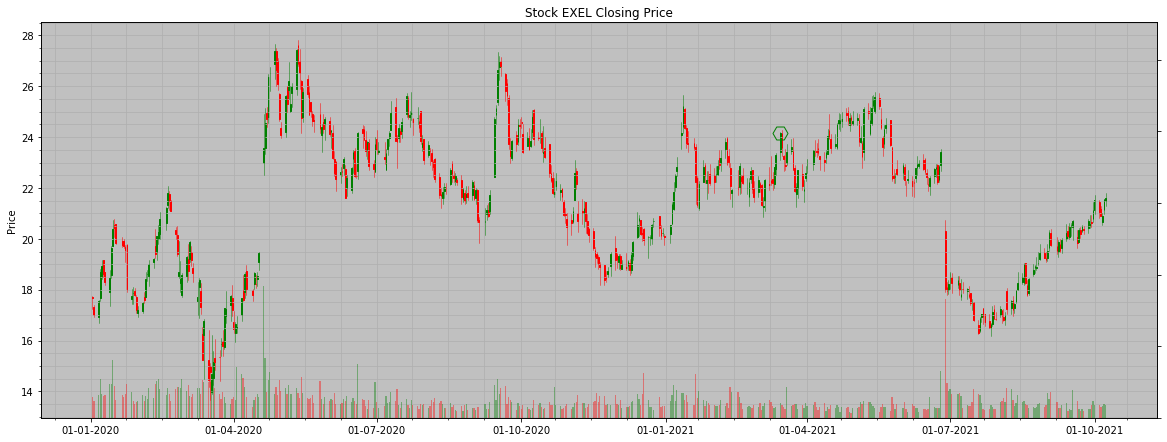

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('silver')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_white_soldiers'] !=0].index, df['Adj Close'].loc[df['three_white_soldiers'] !=0],
                'Hg', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=15.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-03-01':'2021-04-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,three_white_soldiers,VolumePositive
0,737850.0,21.860001,22.469999,21.639999,22.299999,22.299999,1504300,0,True
1,737851.0,22.209999,22.230000,21.840000,22.010000,22.010000,2010300,0,False
2,737852.0,22.100000,22.139999,21.309999,21.330000,21.330000,1113600,0,False
3,737853.0,21.250000,21.650000,20.860001,21.309999,21.309999,1579600,0,True
4,737854.0,21.500000,22.350000,21.080000,22.330000,22.330000,2005500,0,True


Text(0, 0.5, 'Price')

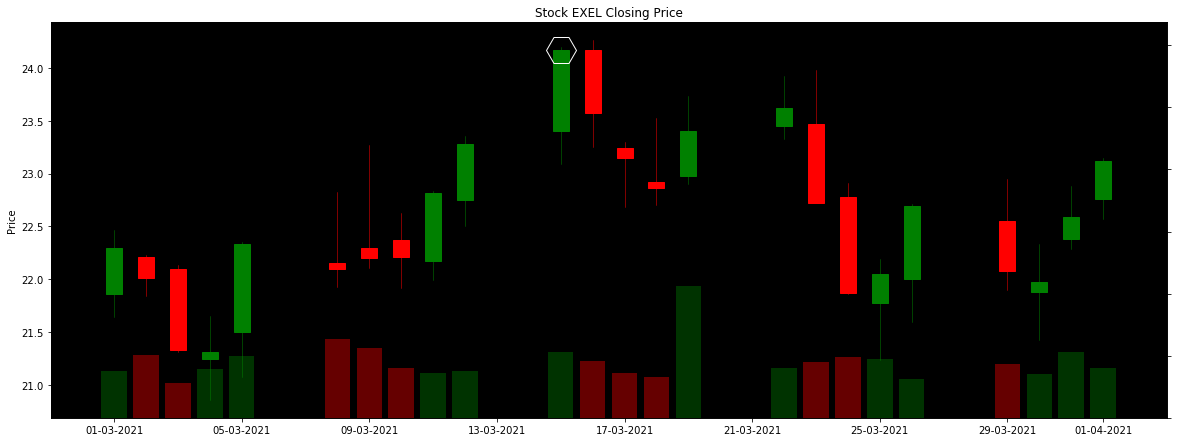

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_white_soldiers'] !=0].index, df['Adj Close'].loc[df['three_white_soldiers'] !=0],
                'Hw', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

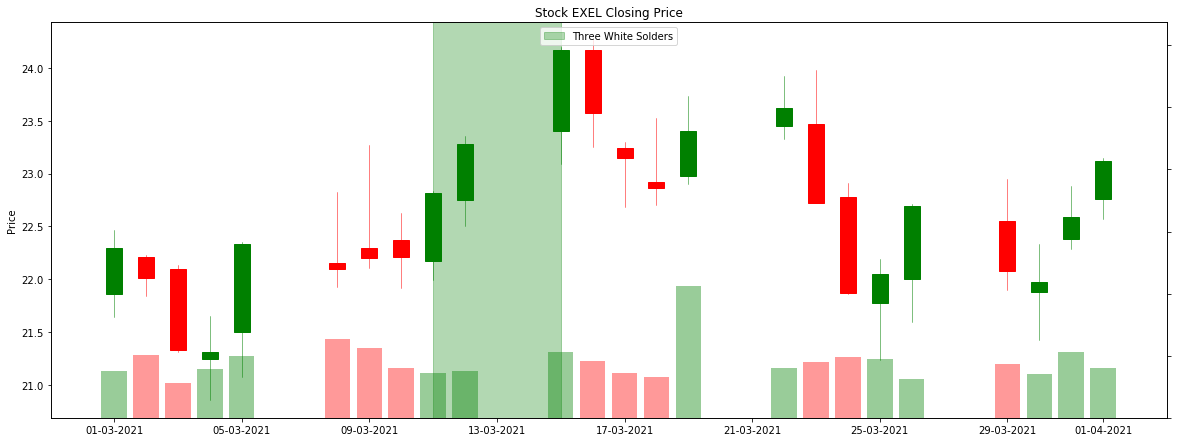

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,3,11)), date2num(datetime(2021,3,15)), 
           label="Three White Solders",color="green", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')